# Exercice 2 

The purpose of this challenge is to build a high performance random forest to properly classify the observations of the "nativeSpeaker" variable between "yes" or "no".

## Task 1
### 1. Import "readingSkills" from the "Party" package
we tried to find if there is any package in python that we can use to get the "readingSkills" dataset, but we didn't find any.
what we did is that we exported the data from R as an csv file:
##### R code
>library(party)

>data(readingSkills)

>write.csv(readingSkills,"ReadingSkills.csv", row.names = TRUE)


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import random

random.seed(1234)

In [2]:
data = pd.read_csv('ReadingSkills.csv')

In [3]:
data.head()

,Unnamed: 0,nativeSpeaker,age,shoeSize,score
0,1,yes,5,24.831889,32.293850
1,2,yes,6,25.952378,36.631049
2,3,no,11,30.421700,49.605927
3,4,yes,7,28.664501,40.284556
4,5,yes,11,31.882070,55.460851


### 2. Data Cleaning

##### 2.1 Missing data
It's time to check how many missing data each variable has.

In [4]:
## check missing data
data.isnull().sum()

Unnamed: 0       0
nativeSpeaker    0
age              0
shoeSize         0
score            0
dtype: int64

None is missing which is good.

In [5]:
data = data.drop('Unnamed: 0', axis=1) ##Remove the column Unnamed
data.head()

,nativeSpeaker,age,shoeSize,score
0,yes,5,24.831889,32.293850
1,yes,6,25.952378,36.631049
2,no,11,30.421700,49.605927
3,yes,7,28.664501,40.284556
4,yes,11,31.882070,55.460851


Scaling is not required

Scaling is done to Normalize data so that priority is not given to a particular feature. Role of Scaling is mostly important in algorithms that are distance based and require Euclidean Distance.

Random Forest is a tree-based model and hence does not require feature scaling.

This algorithm requires partitioning, even if you apply Normalization then also the result would be the same.

### 3. Test-Train Split
To test the performances of our algorithms I will split the dataset into two distinct train and test sets.

In [6]:
#Get Target data 
y = data['nativeSpeaker']

#Load X Variables into a Pandas Dataframe with columns 
X = data.drop(['nativeSpeaker'], axis = 1)

In [7]:
print(f'X : {X.shape}')

X : (200, 3)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

In [9]:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (140, 3)
y_train : (140,)
X_test : (60, 3)
y_test : (60,)


## Task 2 : Fine-tune Random Forest
in this task we are trying to find the best Random Forest Model, basically our Idea is to try diffrent sets of parameters till we find the best model, this called hyperparametering:
### Build Random Forest Model with hyperparameters:
##### Grid Search
In this grid search I will try different combinations of RF hyperparameters.

Most important hyperparameters of Random Forest:

>n_estimators = n of trees

>max_features = max number of features considered for splitting a node

>max_depth = max number of levels in each decision tree

>min_samples_split = min number of data points placed in a node before the node is split

>min_samples_leaf = min number of data points allowed in a leaf node

>bootstrap = method for sampling data points (with or without replacement)


In [10]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [11]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


Creating the Model

In [12]:
rf_Model = RandomForestClassifier()

Creating the Search Grid using our model

In [13]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

Starting the look for the best model for our case of use.

In [14]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 264 tasks      | elapsed:    7.8s
[Parallel(n_jobs=4)]: Done 670 tasks      | elapsed:   14.4s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   18.9s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [15]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 64}

The best parameters to find the best model are :
 >'bootstrap': True,
 >'max_depth': 4,
 >'max_features': 'auto',
 >'min_samples_leaf': 2,
 >'min_samples_split': 5,
 >'n_estimators': 64

## Task 3 : Performance

#### 1. Accuracy 

In [22]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.4f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.4f}')

Train Accuracy - : 0.9786
Test Accuracy - : 0.9667


 The best model from grid-search has a Train accuracy of 97%
 and a Test Accuracy of 96%
 

In [17]:
results = rf_Grid.cv_results_
pred = rf_Grid.predict(X_test)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
pred = le.fit_transform(pred)
testdata = le.fit_transform(y_test)

#### 2. AUC - ROC Curve

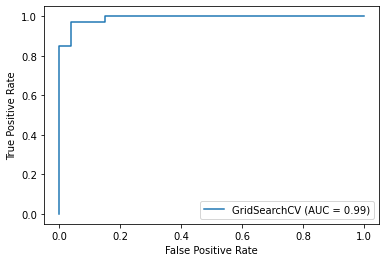

In [18]:
from sklearn.metrics import plot_roc_curve, auc
import matplotlib.pyplot as plt

rf_disp = plot_roc_curve(rf_Grid, X_test, y_test) # Methode 0
plt.show()

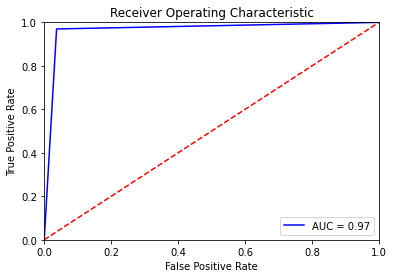

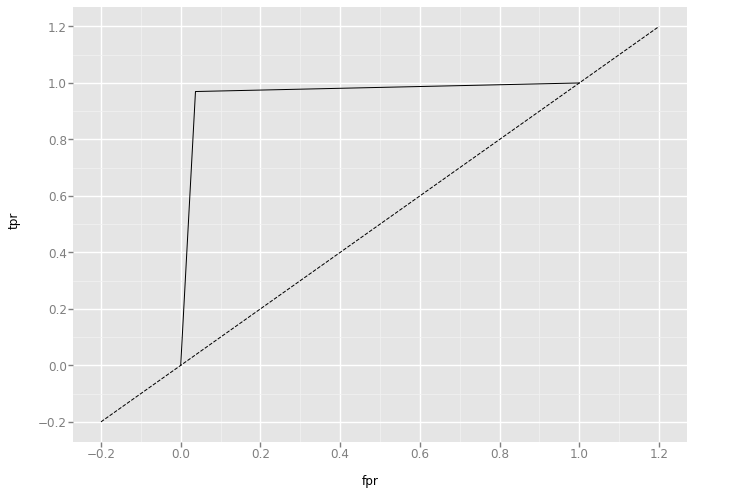

<ggplot: (159497253786)>

In [19]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(testdata, pred)
roc_auc = metrics.auc(fpr, tpr)

# plt Methode 1
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ggplot Methode 2
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

#### 3. Evaluation Results 

In [20]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(testdata, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testdata, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testdata, pred)))
print('AUC et ROC :', metrics.roc_auc_score(testdata, pred))

Mean Absolute Error: 0.03333333333333333
Mean Squared Error: 0.03333333333333333
Root Mean Squared Error: 0.18257418583505536
AUC et ROC : 0.9663299663299665


##### The best model from the grid search has a RMSE of 0.183